#Dataset


In [ ]:
import pandas as pd
from google.colab import drive
from imblearn.over_sampling import RandomOverSampler   #recordar rellenar los datos de las categorias faltantes y probar en un nuevo modelo   VAGO!

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
import spacy
# from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from bs4 import BeautifulSoup
import bs4 as bs4
from urllib.parse import urlparse
import requests
from collections import Counter
import pandas as pd
import os

import pickle

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
! pip install spacy
! python -m spacy download en_core_web_md

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-03-22 03:02:12.103201: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-22 03:02:12.103409: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-22 03:02:12.103442: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries.

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/CVwDL_20231/Proyecto/website_classification.csv")
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
data.head(20)

,Unnamed: 0,website_url,cleaned_website_text,Category
0,353,https://www.321chat.com/,chat free chat room chat room free chat room c...,Social Networking and Messaging
1,864,http://www.loonygames.com/content/2.1/feat/,loonygame present american mcgee alice looking...,Games
2,1161,https://www.archiesonline.com/,archie gifts greetings shop online gifts greet...,E-Commerce
3,192,https://www.medici.tv/en/,world lead classical music channel rare exclus...,Streaming Services
4,782,http://www.boardgamegeek.com/game/5120,doubles wild board game boardgamegeek box roll...,Games
5,529,https://www.csmonitor.com/,christian science monitor christian science mo...,News
6,261,https://www.sportsmanagement.co.uk/index.cfm,sport job sport news sport feature sports mana...,Sports
7,67,https://www.oberoihotels.com/hotels-in-jaipur-...,star hotel jaipur high standards hygiene obero...,Travel
8,990,http://www.worldwidelearn.com/vocational-train...,page find page find page find apology degree b...,Education
9,51,https://www.turansa.com/,guatemala tours travel services turansa guatem...,Travel


In [ ]:
data = data.drop('Unnamed: 0', axis=1)
data.head()

,website_url,cleaned_website_text,Category
0,https://www.321chat.com/,chat free chat room chat room free chat room c...,Social Networking and Messaging
1,http://www.loonygames.com/content/2.1/feat/,loonygame present american mcgee alice looking...,Games
2,https://www.archiesonline.com/,archie gifts greetings shop online gifts greet...,E-Commerce
3,https://www.medici.tv/en/,world lead classical music channel rare exclus...,Streaming Services
4,http://www.boardgamegeek.com/game/5120,doubles wild board game boardgamegeek box roll...,Games


In [ ]:
#Datos nulos
data.isnull()

,website_url,cleaned_website_text,Category
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
1403,False,False,False
1404,False,False,False
1405,False,False,False
1406,False,False,False


In [ ]:
data.website_url.nunique()

1384

In [ ]:
#Eliminamos los URL repetidos
data = data.drop_duplicates(subset='website_url').reset_index(drop=True)
data.shape

(1384, 3)

In [ ]:
# Create a new column 'category_id' with encoded categories 
data['category_id'] = data['Category'].factorize()[0]
category_id_df = data[['Category', 'category_id']].drop_duplicates()


# Dictionaries for future use
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Category']].values)

# New dataframe
data.head()

,website_url,cleaned_website_text,Category,category_id
0,https://www.321chat.com/,chat free chat room chat room free chat room c...,Social Networking and Messaging,0
1,http://www.loonygames.com/content/2.1/feat/,loonygame present american mcgee alice looking...,Games,1
2,https://www.archiesonline.com/,archie gifts greetings shop online gifts greet...,E-Commerce,2
3,https://www.medici.tv/en/,world lead classical music channel rare exclus...,Streaming Services,3
4,http://www.boardgamegeek.com/game/5120,doubles wild board game boardgamegeek box roll...,Games,1


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Social Networking and Messaging'),
  Text(1, 0, 'Games'),
  Text(2, 0, 'E-Commerce'),
  Text(3, 0, 'Streaming Services'),
  Text(4, 0, 'News'),
  Text(5, 0, 'Sports'),
  Text(6, 0, 'Travel'),
  Text(7, 0, 'Education'),
  Text(8, 0, 'Computers and Technology'),
  Text(9, 0, 'Photography'),
  Text(10, 0, 'Law and Government'),
  Text(11, 0, 'Business/Corporate'),
  Text(12, 0, 'Food'),
  Text(13, 0, 'Adult'),
  Text(14, 0, 'Health and Fitness'),
  Text(15, 0, 'Forums')])

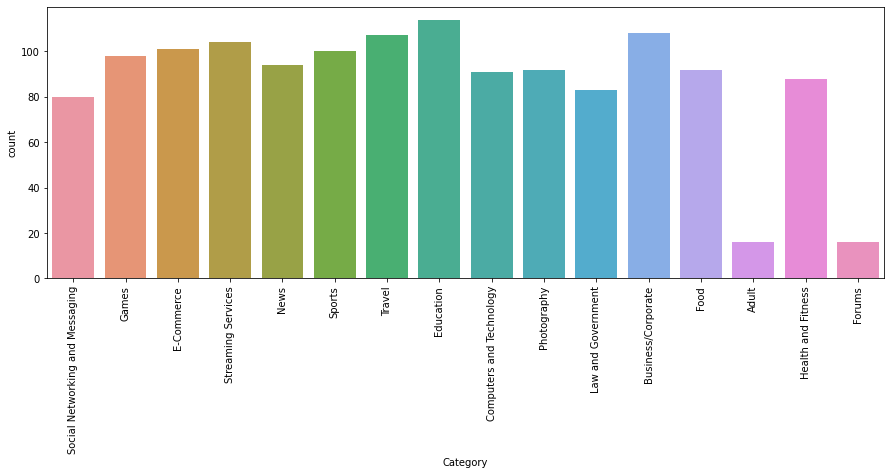

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'Category', data=data)
plt.xticks(rotation = 90)

# DATA

In [ ]:
x = data['cleaned_website_text']
y = data['Category']

In [ ]:
print(type(x))

<class 'pandas.core.series.Series'>


In [ ]:
#tranformo la columna categoria para que sea un array y pueda entrenar la red 
#solo uso label encoder aqui porque es para etiquetas no para texto largo
le = LabelEncoder()
le.fit(y)
# le.classes_    me muestra los textos de las clases que transformara
y = le.transform(y)

In [ ]:
nlp = spacy.load("en_core_web_md")

# Crear una matriz de embedding para cada texto en x
x_em = []
for text in x:
    doc = nlp(text)
    embeddings = doc.vector
    x_em.append(embeddings)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_em, y, test_size=0.33, random_state=42)

# Validacion Cruzada

In [ ]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    # MultinomialNB(),
    GaussianNB()
]

# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
cv_df

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.822581
1,RandomForestClassifier,1,0.806452
2,RandomForestClassifier,2,0.832432
3,RandomForestClassifier,3,0.756757
4,RandomForestClassifier,4,0.735135
5,LinearSVC,0,0.903226
6,LinearSVC,1,0.913978
7,LinearSVC,2,0.875676
8,LinearSVC,3,0.864865
9,LinearSVC,4,0.832432


In [ ]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
GaussianNB,0.806818,0.047838
LinearSVC,0.878035,0.032346
RandomForestClassifier,0.790671,0.042561


# LINEAR SVC


In [ ]:
model_svc = LinearSVC()
history_svc = model_svc.fit(x_train, y_train)
#loss_svc,acc_svc = model_svc.evaluate(y_test,verbose=1)
#print(f'Loss: {loss_svc} - Accuracy: {acc_svc}')

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
# file name, I'm using *.pickle as a file extension
filename = "model_save_svc.pickle"

# save model
pickle.dump(model_svc, open(filename, "wb"))

# load model
mod_salvado_svc= pickle.load(open(filename, "rb"))

In [ ]:
print(x_test)

[array([-6.63205564e-01, -5.00011921e-01,  5.19156009e-02,  1.23099439e-01,
        2.97127461e+00,  3.01227748e-01,  1.23053706e+00,  2.11844540e+00,
       -9.79291201e-01, -5.49744964e-01,  4.02135324e+00,  1.63451827e+00,
       -3.36935234e+00,  1.53163099e+00, -2.80935019e-01,  1.57186413e+00,
        1.49275327e+00,  9.70725656e-01, -1.33138442e+00, -5.82874417e-01,
       -1.26094297e-01, -2.70115763e-01, -2.03003025e+00,  1.56559074e+00,
       -3.62637728e-01, -1.30145788e-01, -2.08081913e+00, -6.52224243e-01,
        1.53641984e-01,  5.99770069e-01,  7.59607077e-01,  6.14059031e-01,
       -5.91471910e-01, -1.29400706e+00,  5.43005645e-01, -2.91110575e-01,
       -1.20413557e-01,  2.52095997e-01, -3.39148283e-01,  6.34749830e-01,
       -1.75895616e-01,  6.82708621e-01, -3.31754982e-02,  1.09271657e+00,
       -1.02266347e+00,  3.25985432e-01,  8.01461577e-01, -1.16687095e+00,
       -8.36006850e-02, -5.27456820e-01, -9.86224353e-01,  1.35045552e+00,
       -6.61236763e-01, 

In [ ]:
predicts_svc=model_svc.predict(x_test)
print(len(x_test))
print(f'The accuracy of train model is {metrics.accuracy_score(y_train,model_svc.predict(x_train))}')
print(f'The accuracy of test model is {metrics.accuracy_score(y_test,predicts_svc)}')

457
The accuracy of train model is 1.0
The accuracy of test model is 0.8774617067833698


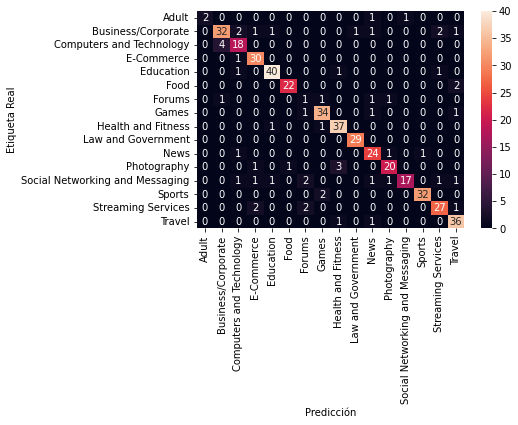

In [ ]:
# Obtener los valores únicos de las etiquetas
labels = sorted(data["Category"].unique())

conf_mat=confusion_matrix(y_test, predicts_svc)
# Crear el DataFrame de la matriz de confusión con los labels
conf_mat_df = pd.DataFrame(conf_mat, index=labels, columns=labels)

# Crear el heatmap con los labels personalizados
sns.heatmap(conf_mat_df, annot=True, fmt='d')

# Personalizar los ejes del heatmap
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
plt.show()

In [ ]:
print(classification_report(y_test, predicts_svc))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.86      0.78      0.82        41
           2       0.75      0.82      0.78        22
           3       0.86      0.97      0.91        31
           4       0.93      0.93      0.93        43
           5       0.96      0.92      0.94        24
           6       0.17      0.20      0.18         5
           7       0.89      0.92      0.91        37
           8       0.88      0.95      0.91        39
           9       0.97      1.00      0.98        29
          10       0.80      0.89      0.84        27
          11       0.87      0.80      0.83        25
          12       0.94      0.65      0.77        26
          13       0.97      0.94      0.96        34
          14       0.87      0.84      0.86        32
          15       0.86      0.95      0.90        38

    accuracy                           0.88       457
   macro avg       0.85   

In [ ]:
print(accuracy_score(y_test, predicts_svc).round(2))

0.88


# MULTINOMIALNB

In [ ]:
#normalizo los datos ya que al parecer hay valores negativos y este modelo no los admite
# Crea una instancia del transformador TfidfTransformer
tfidf = TfidfTransformer()

# Ajusta y transforma los datos de entrenamiento
x_train_norm = tfidf.fit_transform(x_train)

# Escala los datos a un rango entre 0 y 1
scaler = MinMaxScaler()
x_train_normal = scaler.fit_transform(x_train_norm.toarray())


In [ ]:
model_mnb = MultinomialNB()
model_mnb.fit(x_train_normal, y_train)

MultinomialNB()

In [ ]:
y_train_pred = model_mnb.predict(x_train)
predicts_MNB = model_mnb.predict(x_test)

# Accuracy check

print('Train accuracy:', round(accuracy_score(y_train, y_train_pred),2))
print('Test accuracy:', round(accuracy_score(y_test, predicts_MNB),2))

Train accuracy: 0.74
Test accuracy: 0.75


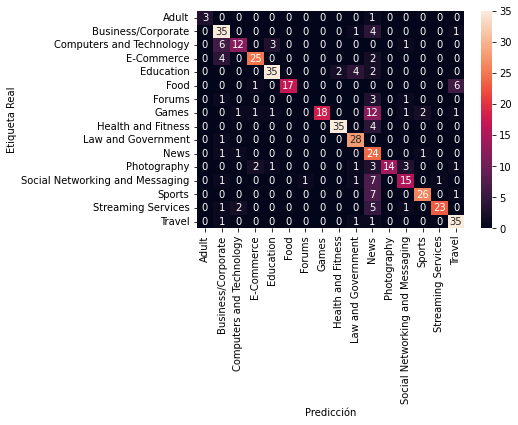

In [ ]:
# Obtener los valores únicos de las etiquetas
labels = sorted(data["Category"].unique())

conf_mat=confusion_matrix(y_test, predicts_MNB)
# Crear el DataFrame de la matriz de confusión con los labels
conf_mat_df = pd.DataFrame(conf_mat, index=labels, columns=labels)

# Crear el heatmap con los labels personalizados
sns.heatmap(conf_mat_df, annot=True, fmt='d')

# Personalizar los ejes del heatmap
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
plt.show()

In [ ]:
print(classification_report(y_test, predicts_MNB))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.69      0.85      0.76        41
           2       0.75      0.55      0.63        22
           3       0.86      0.81      0.83        31
           4       0.88      0.81      0.84        43
           5       1.00      0.71      0.83        24
           6       0.00      0.00      0.00         5
           7       1.00      0.49      0.65        37
           8       0.95      0.90      0.92        39
           9       0.78      0.97      0.86        29
          10       0.32      0.89      0.47        27
          11       1.00      0.56      0.72        25
          12       0.68      0.58      0.62        26
          13       0.90      0.76      0.83        34
          14       0.96      0.72      0.82        32
          15       0.78      0.92      0.84        38

    accuracy                           0.75       457
   macro avg       0.78   

# GaussianNB

In [ ]:
model_gnb=GaussianNB()
model_gnb.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_train_pred1 = model_gnb.predict(x_train)
predicts_GNB = model_gnb.predict(x_test)

# Accuracy check

print('Train accuracy:', round(accuracy_score(y_train, y_train_pred1),2))
print('Test accuracy:', round(accuracy_score(y_test, predicts_GNB),2))

Train accuracy: 0.85
Test accuracy: 0.8


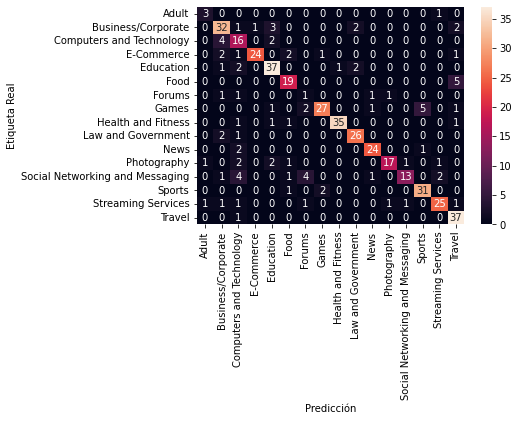

In [ ]:
# Obtener los valores únicos de las etiquetas
labels = sorted(data["Category"].unique())

conf_mat=confusion_matrix(y_test, predicts_GNB)
# Crear el DataFrame de la matriz de confusión con los labels
conf_mat_df = pd.DataFrame(conf_mat, index=labels, columns=labels)

# Crear el heatmap con los labels personalizados
sns.heatmap(conf_mat_df, annot=True, fmt='d')

# Personalizar los ejes del heatmap
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
plt.show()

In [ ]:
print(classification_report(y_test, predicts_MNB))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.69      0.85      0.76        41
           2       0.75      0.55      0.63        22
           3       0.86      0.81      0.83        31
           4       0.88      0.81      0.84        43
           5       1.00      0.71      0.83        24
           6       0.00      0.00      0.00         5
           7       1.00      0.49      0.65        37
           8       0.95      0.90      0.92        39
           9       0.78      0.97      0.86        29
          10       0.32      0.89      0.47        27
          11       1.00      0.56      0.72        25
          12       0.68      0.58      0.62        26
          13       0.90      0.76      0.83        34
          14       0.96      0.72      0.82        32
          15       0.78      0.92      0.84        38

    accuracy                           0.75       457
   macro avg       0.78   

# Web scraping

In [ ]:
class ScrapTool:
    def visit_url(self, website_url):
        '''
        Visit URL. Download the Content. Initialize the beautifulsoup object. Call parsing methods. Return Series object.
        '''
        #headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/54.0.2840.71 Safari/537.36'}
        content = requests.get(website_url,timeout=60).content
        
        #lxml is apparently faster than other settings.
        soup = BeautifulSoup(content, "lxml")
        result = {
            "website_url": website_url,
            "website_name": self.get_website_name(website_url),
            "website_text": self.get_html_title_tag(soup)+self.get_html_meta_tags(soup)+self.get_html_heading_tags(soup)+
                                                               self.get_text_content(soup)
        }
        
        #Convert to Series object and return
        return pd.Series(result)
    
    def get_website_name(self,website_url):
        '''
        Example: returns "google" from "www.google.com"
        '''
        return "".join(urlparse(website_url).netloc.split(".")[-2])
    
    def get_html_title_tag(self,soup):
        '''Return the text content of <title> tag from a webpage'''
        return '. '.join(soup.title.contents)
    
    def get_html_meta_tags(self,soup):
        '''Returns the text content of <meta> tags related to keywords and description from a webpage'''
        tags = soup.find_all(lambda tag: (tag.name=="meta") & (tag.has_attr('name') & (tag.has_attr('content'))))
        content = [str(tag["content"]) for tag in tags if tag["name"] in ['keywords','description']]
        return ' '.join(content)
    
    def get_html_heading_tags(self,soup):
        '''returns the text content of heading tags. The assumption is that headings might contain relatively important text.'''
        tags = soup.find_all(["h1","h2","h3","h4","h5","h6"])
        content = [" ".join(tag.stripped_strings) for tag in tags]
        return ' '.join(content)
    
    def get_text_content(self,soup):
        '''returns the text content of the whole page with some exception to tags. See tags_to_ignore.'''
        tags_to_ignore = ['style', 'script', 'head', 'title', 'meta', '[document]',"h1","h2","h3","h4","h5","h6","noscript"]
        tags = soup.find_all(text=True)
        result = []
        for tag in tags:
            stripped_tag = tag.strip()
            if tag.parent.name not in tags_to_ignore\
                and isinstance(tag, bs4.element.Comment)==False\
                and not stripped_tag.isnumeric()\
                and len(stripped_tag)>0:
                result.append(stripped_tag)
        return ' '.join(result)

import spacy as sp
from collections import Counter
sp.prefer_gpu()
import en_core_web_sm
#anconda prompt ko run as adminstrator and copy paste this:python -m spacy download en
nlp = en_core_web_sm.load()
import re
def clean_text(doc):
    '''
    Clean the document. Remove pronouns, stopwords, lemmatize the words and lowercase them
    '''
    doc = nlp(doc)
    tokens = []
    exclusion_list = ["nan"]
    for token in doc:
        if token.is_stop or token.is_punct or token.text.isnumeric() or (token.text.isalnum()==False) or token.text in exclusion_list :
            continue
        token = str(token.lemma_.lower().strip())
        tokens.append(token)
    return " ".join(tokens) 

In [ ]:
website='https://www.bbc.com/sport/live/football/64405195'
scrapTool = ScrapTool()

web=dict(scrapTool.visit_url(website))
text=(clean_text(web['website_text']))

print(web['website_name']) #Print titulo.

x_em_2 = []
doc2 = nlp(text)
aux = doc2.vector
x_em_2.append(aux)

<ipython-input-41-ae72e15866cb>:46: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  tags = soup.find_all(text=True)


bbc


In [ ]:
print(text)

premier league live nottingham forest v newcastle united score commentary update live bbc sportfollow live text commentary listen bbc radio live update nottingham forest v newcastle united accessibility link media player premier league nottingham forest newcastle united isak volleys leveller get tv licence summary live reporting involved follow famous footstep isak start quality post update half time post update goal nottingham forest newcastle post update post update post update post update post update post update post update involved post update post update hit woodwork post update yellow card match stats line up nottm forest substitutes newcastle substitutes scores friday 17th march stand explore bbchomepage skip content accessibility help bbc account notifications home news sport weather iplayer sounds bitesize cbeebies cbbc food home news sport reel worklife travel future culture tv weather sound menu search bbc search bbc home news sport weather iplayer sounds bitesize cbeebies c

In [ ]:
print(x_em_2[0].shape)
print(type(x_em_2))

(300,)
<class 'list'>


In [ ]:
print(x_em[0].shape)
print(type(x_em))

(300,)
<class 'list'>


In [ ]:
predicts_svc_test=model_svc.predict(x_em_2)

In [ ]:
print(predicts_svc_test)

[13]


In [ ]:
print(id_to_category[model_svc.predict(x_em_2)[0]])

Adult
